### Section 2.1 

It is of much use to us to firstly consider in this project when data may or may not be similar. Often we will look to identify whether key events have shifted the waiting times landscape in some sort of way, and for this will have to rule out the possibility that the data itself is unaffected. A motivating example is that of COVID-19. It is pretty common knowledge that the NHS Scotland during the earlier days of the pandemic had to suspend many operations and procedures. Therefore one might expect the data around waiting times to look different before and after the March 2020 mark. 

An interesting way to approach this is the usage of the Wilcoxon signed-rank test. This is a test which look to address the null-hypothesis that two related pairs of samples come from the same distribution. In order to do this it looks to see whether the distribution of differences between two sets of data is symmetric about 0. It is relatively comparable to the Student's t-test \cite{INSERTREF}, except there are no assumptions of normality about the data. 

Mathematically the test procedure is as follows:

Pair data to create n-samples as $(X_{1}, Y_{1}), ..., (X_{n}, Y_{n}).$

$H_{0}$: The observations $(X_{i}, Y_{i})$ are exchangable, meaning $(X_{i}, Y_{i})$ and $(Y_{i}, X_{i})$ have the same distribution. 

$H_{1}$: For some $\mu \neq 0$, the pairs $(X_{i}, Y_{i})$ and $(Y_{i}+\mu, X_{i}-\mu)$ have the same distribution.

--------------------------------------------


### Section 6.2

Within the reports published by PHS, it can be seen by eye that the 31-day standards and 62-day standards are relatively unaffected by the time period around COVID. That is to say pretty consistently 95% of referalls are still starting their first treatment 31 days within a decision to treat, whilst just under 95% consistently miss starting their first treatment within 62 days of suspcion of cancer.

This might seem odd at first to anyone, since there is a common societiel expectation that cancer waiting times were affected by the pandemic. However if you start to consider what the standards tell us, you soon realise that they have no way of identifying how many people were in the system in the first place who could meet the standards. Therefore it was our belief that we should firstly prove mathematically that the standards are unchanged and then from this deduce that the affliction of COVID-19 on the waiting times landscape doesn't come from the treatment part of the pathway but instead the referalls section.

In order to firstly prove that the waiting time standards are unaffected we look to run a Wilcoxon signed-rank test. The details of the test can be found in the earlier \ref{Sec:HypTesting}. For the Wilcoxon test, our two sets of data must be of equal length in order to be paired. Having 6 data points after the start of COVID-19 (2020Q2 - 2021Q3), we take 6 points prior to compare with (2018Q3 - 2020Q1).

---------------------------------



Below is the code necessary for getting the data into the correct format (uses open data - to be replaced later when necessary).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def ReigonTypeQuarterSelector(myData, reigonCode, cancerType, rows):
    typeData = myData[myData['CancerType']== cancerType]
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', rows[0]: 'sum', rows[1]: 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)

    x = reigonalData["Quarter"]
    y = reigonalData[rows[0]]
    y2 = reigonalData[rows[1]]
    
    return x, y, y2

In [3]:
fullData_31 = pd.read_csv("31DayData.csv")
myData_31 = fullData_31[['Quarter', 'HB', 'HBT', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

fullData_62 = pd.read_csv("62DayData.csv")
myData_62 = fullData_62[['Quarter', 'HB', 'HBT', 'CancerType','NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days']]

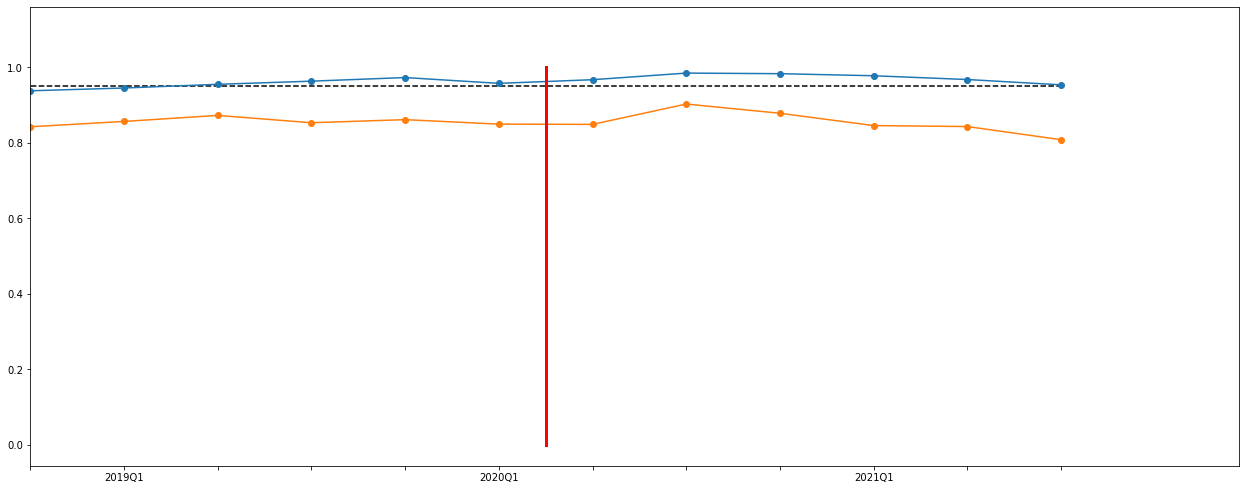

In [24]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019', 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

avg_regions_31 = 0
avg_regions_62 = 0

for i in Reigons:
    x, y, y2 = ReigonTypeQuarterSelector(myData_31, i, 'All Cancer Types', ['NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days'])
    avg_regions_31 += y2/y
    x, y, y2 = ReigonTypeQuarterSelector(myData_62, i, 'All Cancer Types', ['NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days'])
    avg_regions_62 += y2/y

d1.plot([0,38], [0.95,0.95], 'k--')

points_31 = avg_regions_31/len(Reigons)
points_62 = avg_regions_62/len(Reigons)

d1.plot(x, points_31, 'o-')
d1.plot(x, points_62, 'o-')

d1.plot([32.5,32.5], [0,1], color='r', linewidth=3)
d1.set_xlim(left=27)


every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
fig.set_size_inches(18.5, 8, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()

In [17]:
precov_31 = points_31[27:33]
postcov_31 = points_31[33:]

precov_62 = points_62[27:33]
postcov_62 = points_62[33:]

In [27]:
from scipy import stats

test1 = stats.wilcoxon(precov_31, postcov_31, alternative='two-sided')
print(test1)

test2 = stats.wilcoxon(precov_62, postcov_62)
print(test2)

WilcoxonResult(statistic=3.0, pvalue=0.15625)
WilcoxonResult(statistic=9.0, pvalue=0.84375)
